In [1]:
##dataset https://www.kaggle.com/jmq19950824/stock-index-prediction-both-labels-and-features

importing necessary packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as met
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
%matplotlib inline

loading the dataset

In [3]:
dataset=pd.read_csv('C:\\Users\\Eathish\\Downloads\\archive\\DOW30.csv')

In [4]:
dataset

,Date,LABEL,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
0,2008/4/1,0,12266.63965,12659.82031,12266.46973,12654.36035,295530000.0,1.77,1.5615,22.68,897.00,100.92,1.30,2.38
1,2008/4/2,1,12651.66992,12696.29004,12555.16992,12608.91992,232760000.0,1.72,1.5618,23.43,893.50,104.83,1.31,2.18
2,2008/4/3,0,12605.83008,12675.12012,12527.75000,12626.03027,183870000.0,1.70,1.5667,23.21,898.25,103.92,1.35,2.19
3,2008/4/4,1,12626.03027,12688.48047,12528.16016,12609.41992,181260000.0,1.67,1.5735,22.45,905.25,106.09,1.40,2.26
4,2008/4/7,0,12612.58984,12733.66016,12583.28027,12612.42969,198070000.0,1.62,1.5713,22.42,914.70,108.91,1.28,2.24
5,2008/4/8,0,12602.66016,12607.29981,12525.79981,12576.44043,197200000.0,1.71,1.5705,22.36,921.00,108.54,1.32,2.23
6,2008/4/9,1,12574.65039,12621.54981,12468.96973,12527.25977,194950000.0,1.72,1.5804,22.81,906.75,110.89,1.43,2.20
7,2008/4/10,0,12526.78027,12649.30957,12497.21973,12581.98047,227330000.0,1.71,1.5744,21.98,934.25,110.07,1.46,2.30
8,2008/4/11,0,12579.78027,12580.26953,12302.05957,12325.41992,286850000.0,1.73,1.5796,23.46,925.50,110.14,1.54,2.37
9,2008/4/14,1,12324.76953,12367.59961,12280.40039,12302.05957,216010000.0,1.75,1.5827,23.82,917.75,111.71,1.64,2.32


In [5]:
dataset.head()

,Date,LABEL,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
0,2008/4/1,0,12266.63965,12659.82031,12266.46973,12654.36035,295530000.0,1.77,1.5615,22.68,897.00,100.92,1.30,2.38
1,2008/4/2,1,12651.66992,12696.29004,12555.16992,12608.91992,232760000.0,1.72,1.5618,23.43,893.50,104.83,1.31,2.18
2,2008/4/3,0,12605.83008,12675.12012,12527.75000,12626.03027,183870000.0,1.70,1.5667,23.21,898.25,103.92,1.35,2.19
3,2008/4/4,1,12626.03027,12688.48047,12528.16016,12609.41992,181260000.0,1.67,1.5735,22.45,905.25,106.09,1.40,2.26
4,2008/4/7,0,12612.58984,12733.66016,12583.28027,12612.42969,198070000.0,1.62,1.5713,22.42,914.70,108.91,1.28,2.24


In [6]:
dataset.shape

(2448, 14)

In [7]:
dataset.info

<bound method DataFrame.info of            Date  LABEL         Open         High          Low        Close  \
0      2008/4/1      0  12266.63965  12659.82031  12266.46973  12654.36035   
1      2008/4/2      1  12651.66992  12696.29004  12555.16992  12608.91992   
2      2008/4/3      0  12605.83008  12675.12012  12527.75000  12626.03027   
3      2008/4/4      1  12626.03027  12688.48047  12528.16016  12609.41992   
4      2008/4/7      0  12612.58984  12733.66016  12583.28027  12612.42969   
5      2008/4/8      0  12602.66016  12607.29981  12525.79981  12576.44043   
6      2008/4/9      1  12574.65039  12621.54981  12468.96973  12527.25977   
7     2008/4/10      0  12526.78027  12649.30957  12497.21973  12581.98047   
8     2008/4/11      0  12579.78027  12580.26953  12302.05957  12325.41992   
9     2008/4/14      1  12324.76953  12367.59961  12280.40039  12302.05957   
10    2008/4/15      1  12302.05957  12387.79004  12269.80957  12362.46973   
11    2008/4/16      1  12371.50

checking the number of unique values in the dataset

In [8]:
dataset.nunique()

Date            2448
LABEL              2
Open            2438
High            2442
Low             2439
Close           2437
Volume          2339
InterestRate     242
ExchangeRate    1758
VIX             1494
Gold            1900
Oil             2069
TEDSpread        189
EFFR             122
dtype: int64

checking for any null values in the dataset

In [9]:
dataset.isnull().sum()

Date            0
LABEL           0
Open            0
High            0
Low             0
Close           0
Volume          0
InterestRate    0
ExchangeRate    0
VIX             0
Gold            0
Oil             0
TEDSpread       0
EFFR            0
dtype: int64

now we are finding the correlation to understand the relationship between the variables

In [10]:
dataset.corr()

,LABEL,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
LABEL,1.000000,0.007586,0.006496,0.006912,0.005817,0.004489,0.014556,0.015507,-0.010016,0.015902,0.000909,-0.053203,-0.012059
Open,0.007586,1.000000,0.999785,0.999666,0.999447,0.004633,-0.702052,-0.649302,-0.649672,0.136308,-0.362925,-0.289900,0.307616
High,0.006496,0.999785,1.000000,0.999612,0.999725,0.008838,-0.703709,-0.649786,-0.645169,0.134199,-0.364643,-0.285173,0.309787
Low,0.006912,0.999666,0.999612,1.000000,0.999776,-0.002088,-0.699640,-0.648229,-0.659143,0.139483,-0.360268,-0.297124,0.304171
Close,0.005817,0.999447,0.999725,0.999776,1.000000,0.002486,-0.701436,-0.649247,-0.654297,0.137214,-0.362618,-0.292425,0.306066
Volume,0.004489,0.004633,0.008838,-0.002088,0.002486,1.000000,-0.142177,0.045283,0.394233,-0.300362,-0.212701,0.361303,0.456401
InterestRate,0.014556,-0.702052,-0.703709,-0.699640,-0.701436,-0.142177,1.000000,0.634797,0.270787,-0.075697,0.482506,-0.075678,-0.483871
ExchangeRate,0.015507,-0.649302,-0.649786,-0.648229,-0.649247,0.045283,0.634797,1.000000,0.280880,-0.043624,0.773858,0.163365,0.093794
VIX,-0.010016,-0.649672,-0.645169,-0.659143,-0.654297,0.394233,0.270787,0.280880,1.000000,-0.357405,-0.086917,0.669790,-0.036077
Gold,0.015902,0.136308,0.134199,0.139483,0.137214,-0.300362,-0.075697,-0.043624,-0.357405,1.000000,0.308876,-0.475579,-0.357257


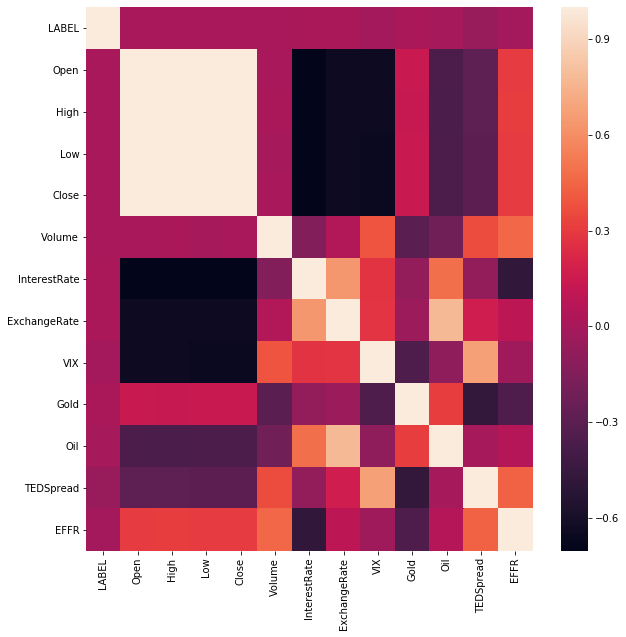

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr())

In [12]:
##to find whether categorical data is there in dataset
cate=[var for var in dataset.columns if dataset[var].dtype=='O']
print('There are {} categorical data\n'.format(len(cate)))

There are 1 categorical data



In [13]:
## to ifnd numerical data is there in dataset
numeri=[var for var in dataset.columns if dataset[var].dtype!='O']
print('There are {} numerical data\n'.format(len(numeri)))

There are 13 numerical data



since we have one categorical varibles we need to change to numerical values and we found that column was data so we are the date columns from the dataset since it has less impact on our prediction

In [14]:
dataset=dataset.drop(['Date'],axis=1)

In [15]:
dataset

,LABEL,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,Gold,Oil,TEDSpread,EFFR
0,0,12266.63965,12659.82031,12266.46973,12654.36035,295530000.0,1.77,1.5615,22.68,897.00,100.92,1.30,2.38
1,1,12651.66992,12696.29004,12555.16992,12608.91992,232760000.0,1.72,1.5618,23.43,893.50,104.83,1.31,2.18
2,0,12605.83008,12675.12012,12527.75000,12626.03027,183870000.0,1.70,1.5667,23.21,898.25,103.92,1.35,2.19
3,1,12626.03027,12688.48047,12528.16016,12609.41992,181260000.0,1.67,1.5735,22.45,905.25,106.09,1.40,2.26
4,0,12612.58984,12733.66016,12583.28027,12612.42969,198070000.0,1.62,1.5713,22.42,914.70,108.91,1.28,2.24
5,0,12602.66016,12607.29981,12525.79981,12576.44043,197200000.0,1.71,1.5705,22.36,921.00,108.54,1.32,2.23
6,1,12574.65039,12621.54981,12468.96973,12527.25977,194950000.0,1.72,1.5804,22.81,906.75,110.89,1.43,2.20
7,0,12526.78027,12649.30957,12497.21973,12581.98047,227330000.0,1.71,1.5744,21.98,934.25,110.07,1.46,2.30
8,0,12579.78027,12580.26953,12302.05957,12325.41992,286850000.0,1.73,1.5796,23.46,925.50,110.14,1.54,2.37
9,1,12324.76953,12367.59961,12280.40039,12302.05957,216010000.0,1.75,1.5827,23.82,917.75,111.71,1.64,2.32


In [16]:
##to find whether categorical data is there in dataset
cate=[var for var in dataset.columns if dataset[var].dtype=='O']
print('There are {} categorical data\n'.format(len(cate)))

There are 0 categorical data



no we removed the categorical values from the dataset

lets us visualize our dataset more

this plot is about Up and  down variables in the dataset

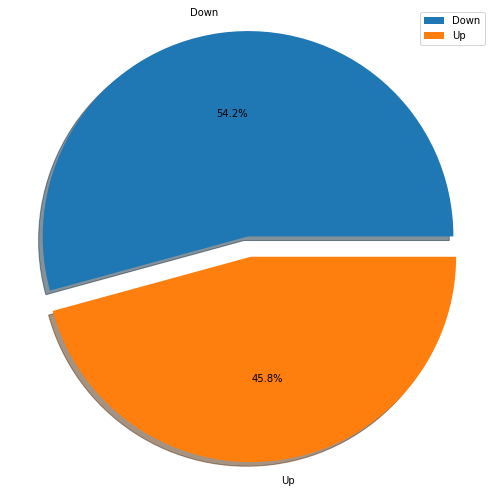

In [22]:
explode = (0.1,0)  
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(dataset['LABEL'].value_counts(), explode=explode,labels=['Down','Up'], autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  
plt.tight_layout()
plt.legend()
plt.show()

this plot is about interest rate and exchange rate in the dataset

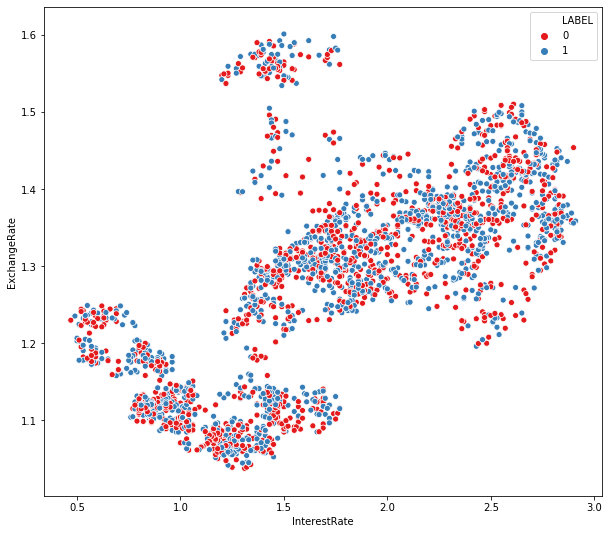

In [24]:
plt.figure(figsize=(10,9))
sns.scatterplot(x='InterestRate',y='ExchangeRate',data=dataset,palette='Set1', hue = 'LABEL');

In [25]:
## summary of these values
print(round(dataset[numeri].describe()),2)

        LABEL     Open     High      Low    Close       Volume  InterestRate  \
count  2448.0   2448.0   2448.0   2448.0   2448.0       2448.0        2448.0   
mean      1.0  14777.0  14858.0  14691.0  14780.0  186091197.0           2.0   
std       0.0   4224.0   4220.0   4228.0   4224.0  110469548.0           1.0   
min       0.0   6547.0   6710.0   6470.0   6547.0    8410000.0           0.0   
25%       0.0  11406.0  11480.0  11302.0  11408.0  103255000.0           1.0   
50%       1.0  14549.0  14587.0  14464.0  14555.0  151360000.0           2.0   
75%       1.0  17725.0  17798.0  17629.0  17723.0  240697500.0           2.0   
max       1.0  26584.0  26617.0  26435.0  26617.0  823940000.0           3.0   

       ExchangeRate     VIX    Gold     Oil  TEDSpread    EFFR  
count        2448.0  2448.0  2448.0  2448.0     2448.0  2448.0  
mean            1.0    20.0  1274.0    76.0        0.0     0.0  
std             0.0    10.0   242.0    25.0        0.0     1.0  
min             1.0

 starting with Logistic regression with 80:20  train and test data

In [27]:
X=dataset.drop('LABEL',axis=1)
y=dataset["LABEL"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [28]:
dataset.shape

(2448, 13)

In [29]:
X_train.shape,X_test.shape

((1958, 12), (490, 12))

In [30]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Eathish\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
pred = lr.predict(X_train)
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, pred)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

Train Result:
Accuracy Score: 54.85%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       884
           1       0.55      1.00      0.71      1074

    accuracy                           0.55      1958
   macro avg       0.27      0.50      0.35      1958
weighted avg       0.30      0.55      0.39      1958

_______________________________________________
Confusion Matrix: 
 [[   0  884]
 [   0 1074]]



C:\Users\Eathish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(lr.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lr.score(X_test, y_test)))

Training set score: 0.5485
Test set score: 0.5184


In [56]:
##checking the actual and predicted value
newdataset= pd.DataFrame({'Actual':y_train,'Predicted':pred})

In [57]:
newdataset

,Actual,Predicted
194,0,1
175,0,1
1924,0,1
461,1,1
1205,1,1
1082,0,1
723,0,1
17,1,1
619,1,1
1188,1,1


Text(0.5, 257.44, 'Predicted label')

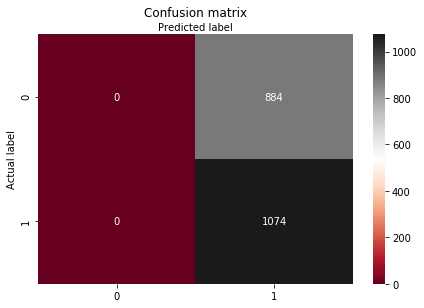

In [33]:
cm = confusion_matrix(y_train,pred)
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="RdGy" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

now decision tree with 80:20  train and test data

In [35]:
X=dataset.drop('LABEL',axis=1)
y=dataset["LABEL"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [38]:
decisiontree=DecisionTreeClassifier(criterion="entropy").fit(X_train,y_train)

In [40]:
decisiontreepredict=decisiontree.predict(X_test)
decisiontreepredict

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [41]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, decisiontreepredict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, decisiontreepredict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, decisiontreepredict)}\n")

Train Result:
Accuracy Score: 47.14%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.44      0.37      0.40       236
           1       0.49      0.56      0.52       254

    accuracy                           0.47       490
   macro avg       0.47      0.47      0.46       490
weighted avg       0.47      0.47      0.47       490

_______________________________________________
Confusion Matrix: 
 [[ 88 148]
 [111 143]]



now now naive bayes is done by splitting 80:20 train and test proportion

In [43]:
X=dataset.drop('LABEL',axis=1)
y=dataset["LABEL"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
X_train.shape,X_test.shape
gaussNb=GaussianNB()
gaussNb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
y_predict=gaussNb.predict(X_test)

In [45]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, y_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_predict)}\n")

Train Result:
Accuracy Score: 50.82%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.37      0.03      0.05       236
           1       0.51      0.95      0.67       254

    accuracy                           0.51       490
   macro avg       0.44      0.49      0.36       490
weighted avg       0.44      0.51      0.37       490

_______________________________________________
Confusion Matrix: 
 [[  7 229]
 [ 12 242]]



NOW KNN CLASSIFICATION

In [46]:
X=dataset.drop('LABEL',axis=1)
y=dataset["LABEL"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [47]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_predict = KNN.predict(X_test)

In [48]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, KNN_predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, KNN_predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, KNN_predict)}\n")

Train Result:
Accuracy Score: 47.76%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.46      0.44      0.45       236
           1       0.50      0.51      0.50       254

    accuracy                           0.48       490
   macro avg       0.48      0.48      0.48       490
weighted avg       0.48      0.48      0.48       490

_______________________________________________
Confusion Matrix: 
 [[104 132]
 [124 130]]



LAST WE ARE TRYING WITH MULTIPERCEPTRONS

In [49]:
X=dataset.drop('LABEL',axis=1)
y=dataset["LABEL"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
multilayerperceptron=MLPClassifier(max_iter=500, activation='relu')

In [50]:
multilayerperceptron.fit(X_train,y_train)
multilayerperceptron_Predict=multilayerperceptron.predict(X_test)

C:\Users\Eathish\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [51]:
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, multilayerperceptron_Predict) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{classification_report(y_test, multilayerperceptron_Predict)}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, multilayerperceptron_Predict)}\n")

Train Result:
Accuracy Score: 51.84%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       236
           1       0.52      1.00      0.68       254

    accuracy                           0.52       490
   macro avg       0.26      0.50      0.34       490
weighted avg       0.27      0.52      0.35       490

_______________________________________________
Confusion Matrix: 
 [[  0 236]
 [  0 254]]



C:\Users\Eathish\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


we have a got a best of 54.85 in logistic regression and that is the best algorithm for this dataset and we have used rmse values and f1 score and r score as a metric for logisic regression